In [1]:
from datetime import datetime as dt

import dash
import dash_bootstrap_components as dbc
import git
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import MATCH, Dash, Input, Output, callback, dcc, html
import networkx as nx


In [2]:
from vehicle_stream_pipeline import utils

In [76]:
repo = git.Repo(".", search_parent_directories=True).git.rev_parse("--show-toplevel")
results_orig = pd.read_csv(
    f"{repo}/data/regression/graph_metrics_5Ksteps.csv"
)


In [53]:
results_orig["#_simulated_rides"] = results_orig["#_simulated_rides"]/11

In [50]:
results_filtered_1= results_orig.iloc[:19]

results_filtered_2 = results_orig.iloc[20::5]

results = pd.concat([results_filtered_1,results_filtered_2])

results

,Unnamed: 0,#_simulated_rides,diameter_w/o_drones,avg_w/o_drones,diameter_with_drones,avg_with_drones
0,0,10000.0,778.730807,248.240229,721.031340,155.555228
1,1,15000.0,725.595797,180.849116,685.460256,114.892926
2,2,20000.0,672.013403,137.447772,529.871842,85.102081
3,3,25000.0,520.013500,115.413574,500.090281,71.939102
4,4,30000.0,507.150810,99.046511,456.568692,59.984934
...,...,...,...,...,...,...
375,375,1885000.0,18.733444,2.088242,18.005934,1.239918
380,380,1910000.0,18.569007,2.065777,17.927704,1.223216
385,385,1935000.0,19.142092,2.049226,18.297731,1.216878
390,390,1960000.0,18.493752,2.025083,17.930003,1.200819


In [13]:
results = results_orig[results_orig['avg_w/o_drones']< 31]


In [77]:
results = results_orig.copy()
results

,Unnamed: 0,#_simulated_rides,diameter_w/o_drones,avg_w/o_drones,diameter_with_drones,avg_with_drones
0,0,10000.0,778.730807,248.240229,721.031340,155.555228
1,1,15000.0,725.595797,180.849116,685.460256,114.892926
2,2,20000.0,672.013403,137.447772,529.871842,85.102081
3,3,25000.0,520.013500,115.413574,500.090281,71.939102
4,4,30000.0,507.150810,99.046511,456.568692,59.984934
...,...,...,...,...,...,...
393,393,1975000.0,18.293892,2.006931,17.642175,1.190875
394,394,1980000.0,18.287848,2.002973,17.730326,1.189028
395,395,1985000.0,17.976373,1.994904,17.419699,1.184042
396,396,1990000.0,18.060496,1.991944,17.405300,1.181629


In [5]:

df_edges.rename(columns={"Start #": "start_id", "Ende #": "end_id"}, inplace=True)

rides_df = pd.read_csv(f"{repo}/data/cleaning/data_cleaned.csv")
rides_df = rides_df[(rides_df["state"] == "completed")]
rides_df["scheduled_to"] = pd.to_datetime(rides_df["scheduled_to"])



In [8]:
import matplotlib.pyplot as plt

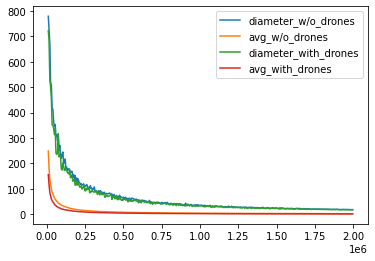

In [207]:
plt.plot(results["#_simulated_rides"],results['diameter_w/o_drones'], label='diameter_w/o_drones')
plt.plot(results["#_simulated_rides"],results['avg_w/o_drones'], label='avg_w/o_drones')
plt.plot(results["#_simulated_rides"],results['diameter_with_drones'], label='diameter_with_drones' )
plt.plot(results["#_simulated_rides"],results['avg_with_drones'], label='avg_with_drones' )

plt.legend()
plt.show()

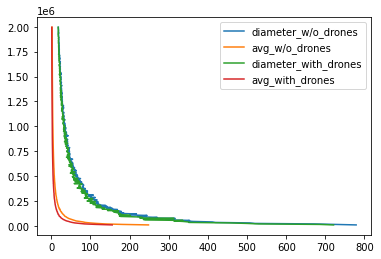

In [9]:
plt.plot(results['diameter_w/o_drones'],results["#_simulated_rides"], label='diameter_w/o_drones')
plt.plot(results['avg_w/o_drones'],results["#_simulated_rides"], label='avg_w/o_drones')
plt.plot(results['diameter_with_drones'], results["#_simulated_rides"],label='diameter_with_drones' )
plt.plot(results['avg_with_drones'], results["#_simulated_rides"],label='avg_with_drones' )

plt.legend()
plt.show()

In [30]:
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


In [31]:
# separate features and target variable
diameter = results['diameter_w/o_drones']

# special case: we only have one feature, so we must reshape the data here
features = results['#_simulated_rides'].values.reshape(-1, 1)

# create a train/test split
dia_train, dia_test, dia_target_train, dia_target_test = train_test_split(
    features, diameter, test_size=0.2, random_state=42)

In [32]:
# create a transformer that generates polynomial features
transformer = PolynomialFeatures(degree=2, include_bias=True)
estimator = LinearRegression()

pipeline = Pipeline([ ('transformer', transformer), ('estimator', estimator)])

pipeline.fit(dia_train, dia_target_train)

prediction = pipeline.predict(features)

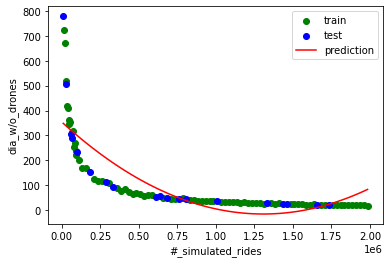

length = 0.0*1 + -0.0005659245577178525*age + 2.1623625990913747e-10*age^2 + 354.27227795991445


c:\Users\jostm7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
# plot the original values
plt.scatter(dia_train, dia_target_train, c='green', label='train')
plt.scatter(dia_test, dia_target_test, c='blue', label='test')

# create a new dataframe that contains the age and the predictions
d = results[['#_simulated_rides']]
d = d.assign(prediction=prediction)

# sort the data before plotting it
d = d.sort_values(by='#_simulated_rides')

# plot the predicted values
plt.plot(d['#_simulated_rides'], d['prediction'], c='red', label='prediction')

plt.xlabel('#_simulated_rides')
plt.ylabel('dia_w/o_drones')
plt.legend()
plt.show()


# print the model that was fitted (the regression formula)
print("length = ", end='')
for i, f in enumerate(pipeline.named_steps['transformer'].get_feature_names(['age'])):
    if i > 0:
        print(" + ", end='')
    print("{}*{}".format(pipeline.named_steps['estimator'].coef_[i], f), end='')
print(" + {}".format(pipeline.named_steps['estimator'].intercept_))

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# predict the values for the test data
predictions = pipeline.predict(dia_test)

# evaluate using different measures
mse = mean_squared_error(dia_target_test, predictions)
r2 = r2_score(dia_target_test, predictions)

print("MSE:", mse)
print("RMSE:", sqrt(mse))
print("R^2:", r2)

# print the model that was fitted (the regression formula)
print("length = ", end='')
for i, f in enumerate(pipeline.named_steps['transformer'].get_feature_names(['age'])):
    if i > 0:
        print(" + ", end='')
    print("{}*{}".format(pipeline.named_steps['estimator'].coef_[i], f), end='')
print(" + {}".format(pipeline.named_steps['estimator'].intercept_))

MSE: 13530.24028621914
RMSE: 116.31956106441916
R^2: 0.6450301162030052
length = 0.0*1 + -0.0005659245577178525*age + 2.1623625990913747e-10*age^2 + 354.27227795991445


c:\Users\jostm7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Polynomial Regression with Numpy

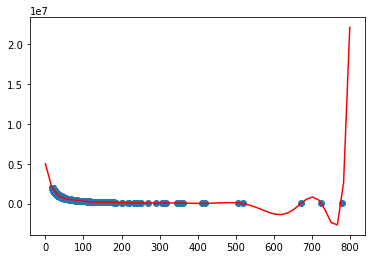

In [7]:
import numpy
import matplotlib.pyplot as plt

y = results['#_simulated_rides']
x = results['diameter_w/o_drones']

model = numpy.poly1d(numpy.polyfit(x, y, 12))

linesp = numpy.linspace(0, 800, 50)

plt.scatter(x, y)
plt.plot(linesp, model(linesp),c='red')
plt.show()

In [36]:
print(model(800))
print(model(600))
print(model(100))
print(model(10))
print(model(1))

14266742.094048401
-777354.527190649
310571.17053269874
2884792.4516577735
4574634.667116919


### Exponential Regression with Numpy

[-0.09248847 14.35964459]


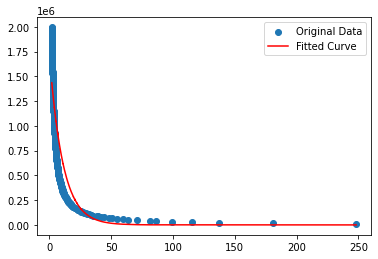

In [106]:
# x = np.divide(results['#_simulated_rides'].to_numpy(),10000)
y = results['#_simulated_rides'].to_numpy()
x = results['avg_w/o_drones'].to_numpy()

def func(x, a, b):
    return np.exp(b) * np.exp(a * x) 

# popt = numpy.polyfit(x, numpy.log(y), 1) # biased towards small values
popt = numpy.polyfit(x, numpy.log(y), 1, w=numpy.sqrt(y))
print(popt)

plt.figure()
plt.scatter(x, y, label="Original Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()


In [23]:
print(func(800, *popt))
print(func(300, *popt))
print(func(30, *popt))

2.2779754919959334
12270.531684256928
1269910.5215986003


In [85]:
results.columns

Index(['Unnamed: 0', '#_simulated_rides', 'diameter_w/o_drones',
       'avg_w/o_drones', 'diameter_with_drones', 'avg_with_drones'],
      dtype='object')

### Exponential Regression with Scipy

[ 2.38210808e+07 -9.54805203e-02 -2.38337011e+07]
-11471.536267045885


C:\Users\jostm7\AppData\Local\Temp/ipykernel_18944/785732791.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return a * np.exp(-b / x) + c


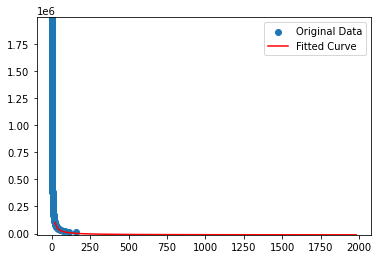

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b / x) + c
    # return a*np.exp(-c*(x-b))+d
    # return a + b*numpy.log(x) + c*numpy.log(x)**2

ydata = results['#_simulated_rides'].to_numpy() #needed to be normalized, else optimization not possible
xdata = results['avg_with_drones'].to_numpy()

popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

x_plot = list(range(0,2000,20))
print( min(func(x_plot, *popt)))
plt.figure()
plt.ylim(-11471.536267045885, max(ydata))
plt.scatter(xdata, ydata, label="Original Data")
plt.plot(x_plot, func(x_plot, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [ ]:
bounds=([-np.inf, 0.0000001, -np.inf], [np.inf, 10, np.inf])

In [100]:
print(func(1960, *popt))
print(func(1980, *popt))
print(x_plot)
print(func(x_plot, *popt))


-11459.814150828868
-11471.536267045885
[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980]
[            inf  1.01374073e+05  4.43088723e+04  2.53173887e+04
  1.58273120e+04  1.01350779e+04  6.34101004e+03  3.63133116e+03
  1.59927411e+03  1.89050645e+01 -1.24531473e+03 -2.27962650e+03
 -3.14151869e+03 -3.87078773e+03 -4.49585772e+03 -5.03757178e+03
 -5.51156148e+03 -5.92977985e+03 -6.30152336e+03 -6.63413105e+03
 -6.93347401e+03 -7.20430487e+03 -7.45051207e+03 -7.67530773e+03
 -7.88136856e+03 -8.07094

C:\Users\jostm7\AppData\Local\Temp/ipykernel_18944/2749238525.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return a * np.exp(-b / x) + c


In [46]:
def curve_fit_numpy(max_days,graph_metrics_df,metric):
    
    # used exponential funciton to interpret result
    def func(x, a, b):
        return np.exp(b) * np.exp(a * x) 

    # gather data
    y = graph_metrics_df['#_simulated_rides'].to_numpy()
    x = graph_metrics_df[metric].to_numpy()
    
    # curve fitting
    popt = numpy.polyfit(x, numpy.log(y), 1, w=numpy.sqrt(y))

    return func(max_days, *popt)


In [107]:
results.columns

Index(['Unnamed: 0', '#_simulated_rides', 'diameter_w/o_drones',
       'avg_w/o_drones', 'diameter_with_drones', 'avg_with_drones'],
      dtype='object')

In [80]:
from scipy.optimize import curve_fit




In [112]:
def regression_function(x, a, b, c):
    """Exponential Decay regression. Will be used for regression curve fitting and to calculate simulated rides number for optimzed parameters/ to calculate regression line

    Args:
        x (list/float): can be a list/list like of floats to calculate y values for x
        a (float): optimized parameter from function get_opt_parameter
        b (float): optimized parameter from function get_opt_parameter
        c (float): optimized parameter from function get_opt_parameter

    Returns:
        list/float: regressed y values for given x - equals the required number of rides for given maximum delivery days
    """
    return a * np.exp(-b / x) + c

In [114]:
def get_opt_parameter(graph_metrics_df,metric='avg_w/o_drones'):
    """Function takes upfront generated graph metrics dataframe as input to execute an exponential decay regression with the data.
       Output are the optimized parameters which can be used input for the function regression_function

    Args:
        graph_metrics_df (DataFrame): DataFrame containing graph metrics for increasing number of rides. Calculated upfront.
        metric (str, optional): graph metric for which regression will be done. ['diameter_w/o_drones',
       'avg_w/o_drones', 'diameter_with_drones', 'avg_with_drones'] are possible. Defaults to 'avg_w/o_drones'.

    Returns:
        list: list of parameters [a,b,c] which can be used as input for the regression_function
    """

    # gather data
    y = graph_metrics_df['#_simulated_rides'].to_numpy()
    x = graph_metrics_df[metric].to_numpy()

    # curve fitting
    popt, pcov = curve_fit(regression_function, x, y)
    
 
    return  popt

In [125]:
print(get_rides_num(5,results,'avg_w/o_drones'))

769816.1042872481


In [181]:
import plotly.express as px
import plotly.graph_objects as go
df = results # iris is a pandas DataFrame
max_days = 10
current_metric = "avg_w/o_drones"
needed_rides = get_rides_num(max_days,df,current_metric)
fig1 = px.scatter(df, x=current_metric, y="#_simulated_rides",color_discrete_sequence=["DarkKhaki"],title="Break Even of Rides" )
fig1['data'][0]['name']='Simulated Rides Data'
fig1['data'][0]['showlegend']=True
fig2 = px.line(x=df[current_metric], y=regression_function(df[current_metric],*get_opt_parameter(df)),color_discrete_sequence=["DarkCyan"])
fig2['data'][0]['name']='Regression of Rides Data'
fig2['data'][0]['showlegend']=True
fig3 = px.line(x=[max_days,max_days], y=[0,needed_rides],color_discrete_sequence=["tomato"])
fig3['data'][0]['name']='Max Days for Delivery'
fig3['data'][0]['showlegend']=True
fig4 = px.line(x=[0,max_days], y=[needed_rides,needed_rides],color_discrete_sequence=["tomato"] )
all_fig = go.Figure(data=fig1.data + fig2.data + fig3.data + fig4.data, layout = fig1.layout, )
all_fig.show()